### 성적 데이터 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], 
              index=['태양','정훈','세민','원준'],
              columns=['시간','성적'] )
data

,시간,성적
태양,2,20
정훈,4,40
세민,8,80
원준,9,90


### 1. 수학 공식을 이용한 해석적 모델
- LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
linear_model = LinearRegression()

In [5]:
linear_model.fit(data[['시간']], data['성적'])
# 문제는 2차원 형태

LinearRegression()

In [6]:
print(linear_model.coef_)
print(linear_model.intercept_)

[10.]
7.105427357601002e-15


In [7]:
linear_model.predict([[7]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [8]:
X=data['시간']
y=data['성적']

In [9]:
X.values.reshape(-1,1)
# 2차원으로 변경

array([[2],
       [4],
       [8],
       [9]], dtype=int64)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


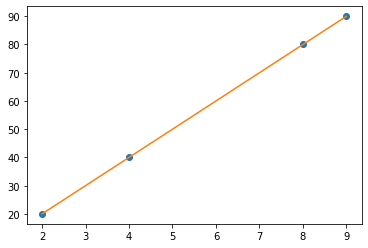

In [10]:
plt.plot(X,y,'o')
plt.plot(X,linear_model.predict(X.values.reshape(-1,1)))
plt.show()

### 2. 경사하강법
- 가중치(w)변화에 따른 비용함수(cost) 값의 변화 그래프를 그리며 확인

가설 H(x)

In [11]:
def h(w,x):
    return w*x+0;

비용함수 Cost Function (mse 평균제곱오차)

In [12]:
# data : 특성 / target : 실제답 / weight : 가중치
def cost(data,target,weight):
    y_pre = h(weight,data) # 예측값
    return ((y_pre-target)**2).mean() #평균제곱오차 mse

cost 함수 사용

In [13]:
cost(data['시간'],data['성적'],10)
# mse 0 

0.0

In [17]:
cost(data['시간'],data['성적'],8)

165.0

In [19]:
# for문 돌려 가중치 값에 따른 mse 출력하기
cost_lst = [] # mse값 저장
weight_range = range(-10,31)
for w in weight_range:
    c = cost(data['시간'],data['성적'],w)
    cost_lst.append(c)
cost_lst

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

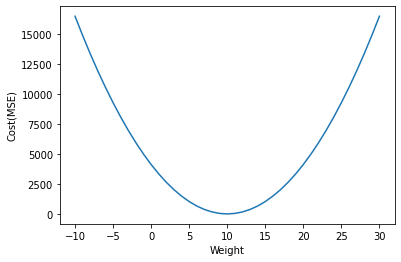

In [22]:
plt.plot(weight_range, cost_lst)
plt.xlabel('Weight')
plt.ylabel('Cost(MSE)')
plt.show()

- SGDRegressor 사용하기

In [23]:
from sklearn.linear_model import SGDRegressor # 경사하강법을 적용한 모델

In [33]:
# sgd 경사하강법 사용
# 알파(learning rate 학습률) : eta0
# 반복횟수 : max_iter
# 학습현황 출력 여부 : verbose 1

sgd_model = SGDRegressor(eta0 = 0.00001,
                        max_iter = 5000,
                        verbose=1)

In [34]:
sgd_model.fit(data[['시간']], data['성적']) # 훈련문제, 훈련답
# Norm : Weight / Bias / loss(cost-MSE)
# loss가 증가하면 학습중지

-- Epoch 1
Norm: 0.01, NNZs: 1, Bias: 0.001934, T: 4, Avg. loss: 2060.515025
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 1, Bias: 0.003409, T: 8, Avg. loss: 2055.234008
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 1, Bias: 0.004682, T: 12, Avg. loss: 2050.944870
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 1, Bias: 0.005846, T: 16, Avg. loss: 2047.238714
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 1, Bias: 0.006953, T: 20, Avg. loss: 2043.805550
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 1, Bias: 0.008010, T: 24, Avg. loss: 2040.530565
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 1, Bias: 0.009016, T: 28, Avg. loss: 2037.395562
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 1, Bias: 0.009984, T: 32, Avg. loss: 2034.419602
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 1, Bias: 0.010927, T: 36, Avg. loss: 2031.547468
Total training time:

-- Epoch 823
Norm: 2.12, NNZs: 1, Bias: 0.295244, T: 3292, Avg. loss: 1267.898452
Total training time: 0.19 seconds.
-- Epoch 824
Norm: 2.12, NNZs: 1, Bias: 0.295482, T: 3296, Avg. loss: 1267.335482
Total training time: 0.19 seconds.
-- Epoch 825
Norm: 2.12, NNZs: 1, Bias: 0.295719, T: 3300, Avg. loss: 1266.772937
Total training time: 0.19 seconds.
-- Epoch 826
Norm: 2.12, NNZs: 1, Bias: 0.295957, T: 3304, Avg. loss: 1266.210781
Total training time: 0.19 seconds.
-- Epoch 827
Norm: 2.13, NNZs: 1, Bias: 0.296194, T: 3308, Avg. loss: 1265.649023
Total training time: 0.19 seconds.
-- Epoch 828
Norm: 2.13, NNZs: 1, Bias: 0.296431, T: 3312, Avg. loss: 1265.087733
Total training time: 0.19 seconds.
-- Epoch 829
Norm: 2.13, NNZs: 1, Bias: 0.296668, T: 3316, Avg. loss: 1264.526865
Total training time: 0.19 seconds.
-- Epoch 830
Norm: 2.13, NNZs: 1, Bias: 0.296905, T: 3320, Avg. loss: 1263.966384
Total training time: 0.19 seconds.
-- Epoch 831
Norm: 2.13, NNZs: 1, Bias: 0.297142, T: 3324, Avg. 

Norm: 3.30, NNZs: 1, Bias: 0.459872, T: 6604, Avg. loss: 907.731353
Total training time: 0.37 seconds.
-- Epoch 1652
Norm: 3.30, NNZs: 1, Bias: 0.460041, T: 6608, Avg. loss: 907.392695
Total training time: 0.37 seconds.
-- Epoch 1653
Norm: 3.31, NNZs: 1, Bias: 0.460210, T: 6612, Avg. loss: 907.054218
Total training time: 0.37 seconds.
-- Epoch 1654
Norm: 3.31, NNZs: 1, Bias: 0.460378, T: 6616, Avg. loss: 906.715908
Total training time: 0.37 seconds.
-- Epoch 1655
Norm: 3.31, NNZs: 1, Bias: 0.460547, T: 6620, Avg. loss: 906.377768
Total training time: 0.37 seconds.
-- Epoch 1656
Norm: 3.31, NNZs: 1, Bias: 0.460715, T: 6624, Avg. loss: 906.039820
Total training time: 0.37 seconds.
-- Epoch 1657
Norm: 3.31, NNZs: 1, Bias: 0.460884, T: 6628, Avg. loss: 905.702051
Total training time: 0.37 seconds.
-- Epoch 1658
Norm: 3.31, NNZs: 1, Bias: 0.461052, T: 6632, Avg. loss: 905.364450
Total training time: 0.37 seconds.
-- Epoch 1659
Norm: 3.31, NNZs: 1, Bias: 0.461221, T: 6636, Avg. loss: 905.027

-- Epoch 2475
Norm: 4.19, NNZs: 1, Bias: 0.582510, T: 9900, Avg. loss: 678.242156
Total training time: 0.56 seconds.
-- Epoch 2476
Norm: 4.19, NNZs: 1, Bias: 0.582642, T: 9904, Avg. loss: 678.013487
Total training time: 0.56 seconds.
-- Epoch 2477
Norm: 4.19, NNZs: 1, Bias: 0.582774, T: 9908, Avg. loss: 677.784919
Total training time: 0.56 seconds.
-- Epoch 2478
Norm: 4.19, NNZs: 1, Bias: 0.582905, T: 9912, Avg. loss: 677.556447
Total training time: 0.56 seconds.
-- Epoch 2479
Norm: 4.19, NNZs: 1, Bias: 0.583037, T: 9916, Avg. loss: 677.328072
Total training time: 0.56 seconds.
-- Epoch 2480
Norm: 4.19, NNZs: 1, Bias: 0.583169, T: 9920, Avg. loss: 677.099803
Total training time: 0.56 seconds.
-- Epoch 2481
Norm: 4.19, NNZs: 1, Bias: 0.583300, T: 9924, Avg. loss: 676.871635
Total training time: 0.56 seconds.
-- Epoch 2482
Norm: 4.19, NNZs: 1, Bias: 0.583432, T: 9928, Avg. loss: 676.643563
Total training time: 0.56 seconds.
-- Epoch 2483
Norm: 4.19, NNZs: 1, Bias: 0.583563, T: 9932, Avg.

-- Epoch 3310
Norm: 4.90, NNZs: 1, Bias: 0.681506, T: 13240, Avg. loss: 517.184459
Total training time: 0.75 seconds.
-- Epoch 3311
Norm: 4.90, NNZs: 1, Bias: 0.681613, T: 13244, Avg. loss: 517.022322
Total training time: 0.75 seconds.
-- Epoch 3312
Norm: 4.90, NNZs: 1, Bias: 0.681720, T: 13248, Avg. loss: 516.860251
Total training time: 0.75 seconds.
-- Epoch 3313
Norm: 4.90, NNZs: 1, Bias: 0.681827, T: 13252, Avg. loss: 516.698244
Total training time: 0.75 seconds.
-- Epoch 3314
Norm: 4.90, NNZs: 1, Bias: 0.681933, T: 13256, Avg. loss: 516.536299
Total training time: 0.75 seconds.
-- Epoch 3315
Norm: 4.90, NNZs: 1, Bias: 0.682040, T: 13260, Avg. loss: 516.374414
Total training time: 0.75 seconds.
-- Epoch 3316
Norm: 4.90, NNZs: 1, Bias: 0.682147, T: 13264, Avg. loss: 516.212595
Total training time: 0.75 seconds.
-- Epoch 3317
Norm: 4.90, NNZs: 1, Bias: 0.682254, T: 13268, Avg. loss: 516.050841
Total training time: 0.75 seconds.
-- Epoch 3318
Norm: 4.90, NNZs: 1, Bias: 0.682360, T: 13

-- Epoch 4142
Norm: 5.48, NNZs: 1, Bias: 0.762572, T: 16568, Avg. loss: 401.407871
Total training time: 0.94 seconds.
-- Epoch 4143
Norm: 5.48, NNZs: 1, Bias: 0.762660, T: 16572, Avg. loss: 401.288902
Total training time: 0.94 seconds.
-- Epoch 4144
Norm: 5.48, NNZs: 1, Bias: 0.762749, T: 16576, Avg. loss: 401.169978
Total training time: 0.94 seconds.
-- Epoch 4145
Norm: 5.48, NNZs: 1, Bias: 0.762838, T: 16580, Avg. loss: 401.051096
Total training time: 0.94 seconds.
-- Epoch 4146
Norm: 5.49, NNZs: 1, Bias: 0.762927, T: 16584, Avg. loss: 400.932256
Total training time: 0.94 seconds.
-- Epoch 4147
Norm: 5.49, NNZs: 1, Bias: 0.763016, T: 16588, Avg. loss: 400.813457
Total training time: 0.94 seconds.
-- Epoch 4148
Norm: 5.49, NNZs: 1, Bias: 0.763105, T: 16592, Avg. loss: 400.694702
Total training time: 0.94 seconds.
-- Epoch 4149
Norm: 5.49, NNZs: 1, Bias: 0.763193, T: 16596, Avg. loss: 400.575990
Total training time: 0.94 seconds.
-- Epoch 4150
Norm: 5.49, NNZs: 1, Bias: 0.763282, T: 16

Total training time: 1.12 seconds.
-- Epoch 4991
Norm: 5.98, NNZs: 1, Bias: 0.831858, T: 19964, Avg. loss: 313.964523
Total training time: 1.12 seconds.
-- Epoch 4992
Norm: 5.98, NNZs: 1, Bias: 0.831933, T: 19968, Avg. loss: 313.875721
Total training time: 1.12 seconds.
-- Epoch 4993
Norm: 5.98, NNZs: 1, Bias: 0.832008, T: 19972, Avg. loss: 313.786949
Total training time: 1.12 seconds.
-- Epoch 4994
Norm: 5.98, NNZs: 1, Bias: 0.832082, T: 19976, Avg. loss: 313.698205
Total training time: 1.12 seconds.
-- Epoch 4995
Norm: 5.99, NNZs: 1, Bias: 0.832157, T: 19980, Avg. loss: 313.609491
Total training time: 1.12 seconds.
-- Epoch 4996
Norm: 5.99, NNZs: 1, Bias: 0.832232, T: 19984, Avg. loss: 313.520807
Total training time: 1.12 seconds.
-- Epoch 4997
Norm: 5.99, NNZs: 1, Bias: 0.832307, T: 19988, Avg. loss: 313.432153
Total training time: 1.12 seconds.
-- Epoch 4998
Norm: 5.99, NNZs: 1, Bias: 0.832382, T: 19992, Avg. loss: 313.343528
Total training time: 1.12 seconds.
-- Epoch 4999
Norm: 5

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=1e-05, max_iter=5000, verbose=1)

In [35]:
print('가중치:',sgd_model.coef_)
print('절편:',sgd_model.intercept_)

가중치: [5.98812201]
절편: [0.83253146]


In [36]:
# 예측
sgd_model.predict([[7]])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([42.74938551])